**Imports**

In [85]:
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
import numpy as np 
import pandas as pd

In [86]:
#Import the Dataset we are working with

In [87]:
data_url = 'https://raw.githubusercontent.com/georgetown-analytics/Formula1/main/data/processed/OneHot_MasterData5.csv'
data_df = pd.read_csv(data_url, sep = ',', engine = 'python', encoding = 'latin-1')

**Modeling**

In [88]:
#Modeling with One Hot Encoded version of our Data

In [89]:
data_df.head()

,raceId,driverId,constructorId,grid,position,positionOrder,laps,fastestLap,rank,fastestLapSpeed,familyStatus,CompletionStatus,year,circuitId,alt,isHistoric,trackType,total_lap_time,average_lap_time,minimum_lap_time,PRCP,TAVG,TMAX,TMIN,positionText_CompletionStatus_1,country_CompletionStatus_1,nationality_CompletionStatus_1,bundled_circuitId_CompletionStatus_1,binned_circuits_CompletionStatus_1,positionText_CompletionStatus_2,country_CompletionStatus_2,nationality_CompletionStatus_2,bundled_circuitId_CompletionStatus_2,binned_circuits_CompletionStatus_2
0,1,1,1,18,NaN,20,58,39.0,13.0,214.455,3,0,2009,1,10,0,2,5658698,97563.758621,89020,0.0,72.0,78.0,66.0,1.000000,0.351812,0.240838,0.250732,0.277588,0.000000,0.648188,0.759162,0.749268,0.722412
1,1,2,2,9,10.0,10,58,48.0,5.0,216.245,4,1,2009,1,10,0,2,5662869,97635.672414,88283,0.0,72.0,78.0,66.0,0.031320,0.351812,0.209566,0.250732,0.277588,0.968680,0.648188,0.790434,0.749268,0.722412
2,1,3,3,5,6.0,6,58,48.0,1.0,217.668,4,1,2009,1,10,0,2,5661506,97612.172414,87706,0.0,72.0,78.0,66.0,0.002165,0.351812,0.209566,0.250732,0.277588,0.997835,0.648188,0.790434,0.749268,0.722412
3,1,4,4,10,5.0,5,58,53.0,9.0,215.199,4,1,2009,1,10,0,2,5660663,97597.637931,88712,0.0,72.0,78.0,66.0,0.002160,0.351812,0.231140,0.250732,0.277588,0.997840,0.648188,0.768860,0.749268,0.722412
4,1,6,3,11,NaN,18,17,6.0,18.0,212.301,1,0,2009,1,10,0,2,1560978,91822.235294,89923,0.0,72.0,78.0,66.0,0.997633,0.351812,0.361371,0.250732,0.277588,0.002367,0.648188,0.638629,0.749268,0.722412


In [90]:
data_df.columns

Index(['raceId', 'driverId', 'constructorId', 'grid', 'position',
       'positionOrder', 'laps', 'fastestLap', 'rank', 'fastestLapSpeed',
       'familyStatus', 'CompletionStatus', 'year', 'circuitId', 'alt',
       'isHistoric', 'trackType', 'total_lap_time', 'average_lap_time',
       'minimum_lap_time', 'PRCP', 'TAVG', 'TMAX', 'TMIN',
       'positionText_CompletionStatus_1', 'country_CompletionStatus_1',
       'nationality_CompletionStatus_1',
       'bundled_circuitId_CompletionStatus_1',
       'binned_circuits_CompletionStatus_1', 'positionText_CompletionStatus_2',
       'country_CompletionStatus_2', 'nationality_CompletionStatus_2',
       'bundled_circuitId_CompletionStatus_2',
       'binned_circuits_CompletionStatus_2'],
      dtype='object')

In [91]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [92]:
data_df.head()

,raceId,driverId,constructorId,grid,position,positionOrder,laps,fastestLap,rank,fastestLapSpeed,familyStatus,CompletionStatus,year,circuitId,alt,isHistoric,trackType,total_lap_time,average_lap_time,minimum_lap_time,PRCP,TAVG,TMAX,TMIN,positionText_CompletionStatus_1,country_CompletionStatus_1,nationality_CompletionStatus_1,bundled_circuitId_CompletionStatus_1,binned_circuits_CompletionStatus_1,positionText_CompletionStatus_2,country_CompletionStatus_2,nationality_CompletionStatus_2,bundled_circuitId_CompletionStatus_2,binned_circuits_CompletionStatus_2
0,1,1,1,18,NaN,20,58,39.0,13.0,214.455,3,0,2009,1,10,0,2,5658698,97563.758621,89020,0.0,72.0,78.0,66.0,1.000000,0.351812,0.240838,0.250732,0.277588,0.000000,0.648188,0.759162,0.749268,0.722412
1,1,2,2,9,10.0,10,58,48.0,5.0,216.245,4,1,2009,1,10,0,2,5662869,97635.672414,88283,0.0,72.0,78.0,66.0,0.031320,0.351812,0.209566,0.250732,0.277588,0.968680,0.648188,0.790434,0.749268,0.722412
2,1,3,3,5,6.0,6,58,48.0,1.0,217.668,4,1,2009,1,10,0,2,5661506,97612.172414,87706,0.0,72.0,78.0,66.0,0.002165,0.351812,0.209566,0.250732,0.277588,0.997835,0.648188,0.790434,0.749268,0.722412
3,1,4,4,10,5.0,5,58,53.0,9.0,215.199,4,1,2009,1,10,0,2,5660663,97597.637931,88712,0.0,72.0,78.0,66.0,0.002160,0.351812,0.231140,0.250732,0.277588,0.997840,0.648188,0.768860,0.749268,0.722412
4,1,6,3,11,NaN,18,17,6.0,18.0,212.301,1,0,2009,1,10,0,2,1560978,91822.235294,89923,0.0,72.0,78.0,66.0,0.997633,0.351812,0.361371,0.250732,0.277588,0.002367,0.648188,0.638629,0.749268,0.722412


In [93]:
#Set X and Y vars
#Drop nulls

In [94]:
data_df = data_df.dropna(axis=0)

In [114]:
X = data_df[['grid',
       'alt',
        'average_lap_time',
       'minimum_lap_time', 'PRCP', 'TAVG', 'TMAX', 'TMIN',
       'country_CompletionStatus_1',
       'nationality_CompletionStatus_1',
       'bundled_circuitId_CompletionStatus_1',
       'binned_circuits_CompletionStatus_1',
       'country_CompletionStatus_2', 'nationality_CompletionStatus_2',
       'bundled_circuitId_CompletionStatus_2',
       'binned_circuits_CompletionStatus_2']]


In [115]:
y = MasterData5_df['Completion Status']

In [116]:
#Address Class Imbalance Issue

In [117]:
from imblearn.over_sampling import SMOTE, ADASYN

In [118]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [119]:
print(sorted(Counter(y_resampled).items()))

[(0, 5502), (1, 5502)]


In [120]:
#Model with resampled data

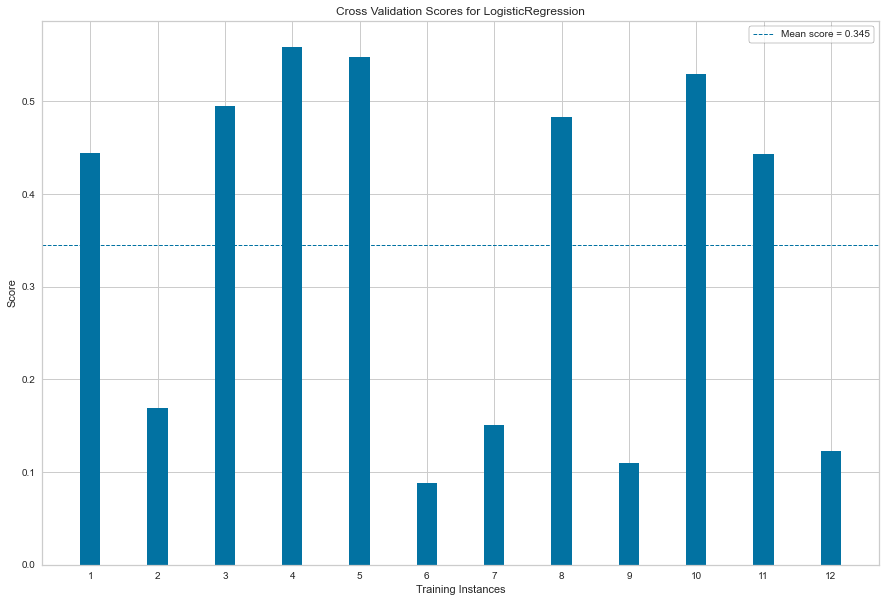

<AxesSubplot:title={'center':'Cross Validation Scores for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [130]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.model_selection import KFold

from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = KFold(n_splits=12)

# Instantiate the classification model and visualizer
model = LogisticRegression()
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_resampled, y_resampled)
visualizer.show()

In [122]:
#These results are confusing...

In [123]:
#Now to test various models on our resampled data and visualize with Classification Heatmaps

In [124]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

from yellowbrick.classifier import ClassificationReport

In [125]:
def score_model(X_resampled, y_resampled, estimator, **kwargs):
    """
    Test various estimators.
    """
    # Instantiate the classification model and visualizer
    model.fit(X_resampled, y_resampled, **kwargs)  
    
    expected  = y_resampled
    predicted = model.predict(X_resampled)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))
    

models = [
    SVC(gamma='auto'), 
    NuSVC(gamma='auto'), 
    LinearSVC(),  
    KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), 
    LogisticRegressionCV(cv=3), 
    BaggingClassifier(), 
    ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X_resampled, y_resampled, model)

SVC: 1.0
NuSVC: 1.0


/Users/jamesbifulco/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC: 0.6666666666666666
KNeighborsClassifier: 0.8919461163657207
LogisticRegression: 0.592147723198279
LogisticRegressionCV: 0.5733707967008067
BaggingClassifier: 0.9996365618753408
ExtraTreesClassifier: 1.0
RandomForestClassifier: 1.0


In [126]:
#Visualization

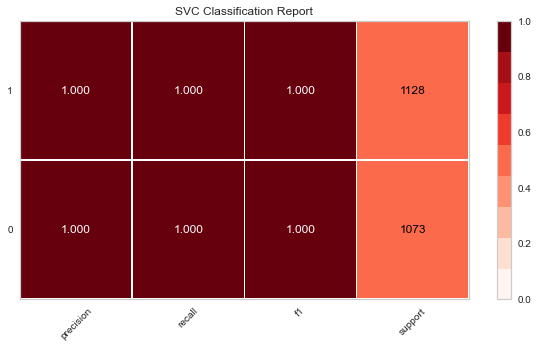

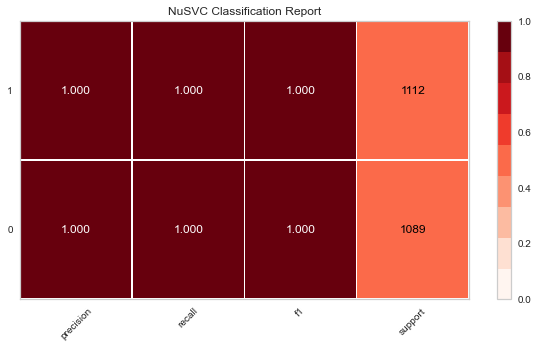

/Users/jamesbifulco/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


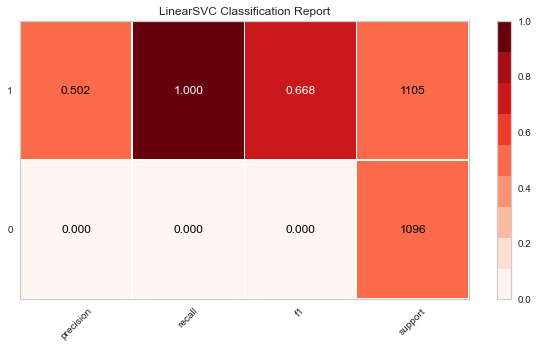

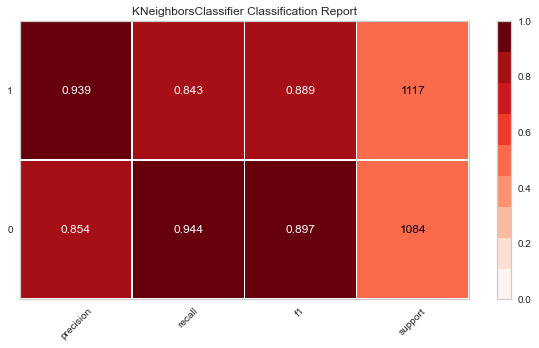

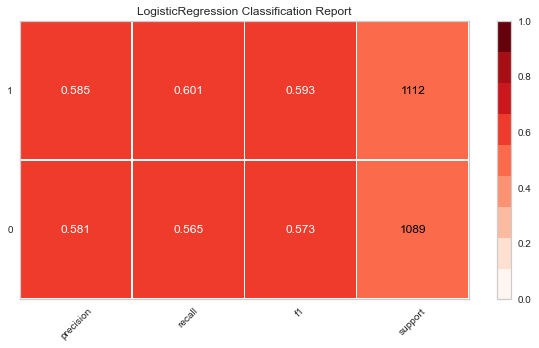

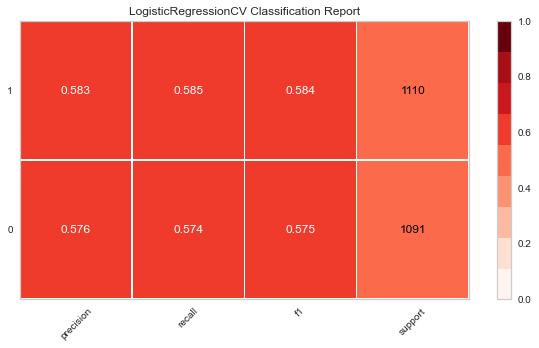

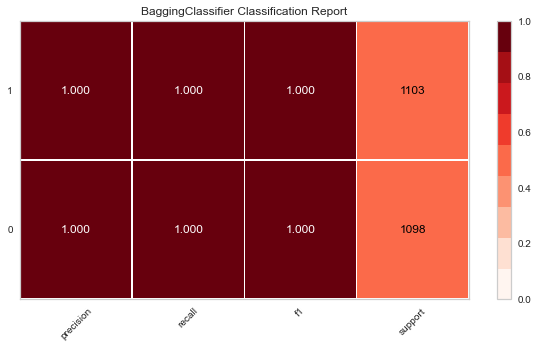

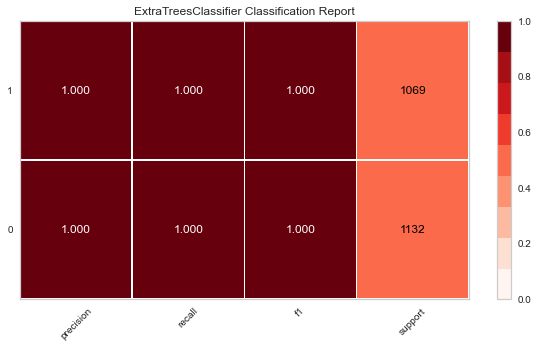

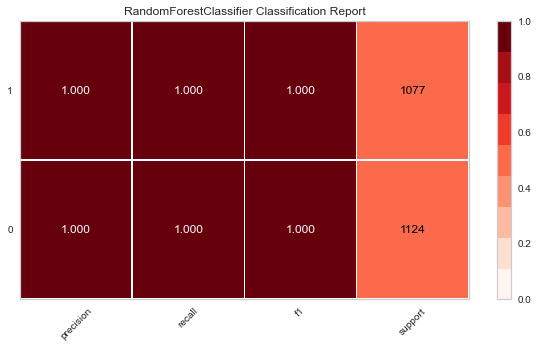

In [127]:
def visualize_model(X_resampled, y_resampled, estimator):
    """
    Test various estimators.
    """ 
    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, 
        classes=[0,1], 
        cmap="Reds", 
        support=True,
        size=(600, 360)
    )
    
    X_train, X_test, y_train, y_test = tts(X_resampled, y_resampled, test_size=0.20)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  

for model in models:
    visualize_model(X_resampled, y_resampled, model)

**Questions/Concerns**
- It seems like something is going wrong with our modeling
- Am I missing a step of data re-shuffling before modeling?
- I'm not sure how to K Fold CV to shuffle data before modeling. 
- For now, Logistic Regression Classification and Logistic Regression CV seem most viable

**Feature Evaluation Visualiztion**

In [128]:
#Feature Importances

/Users/jamesbifulco/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(
/Users/jamesbifulco/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


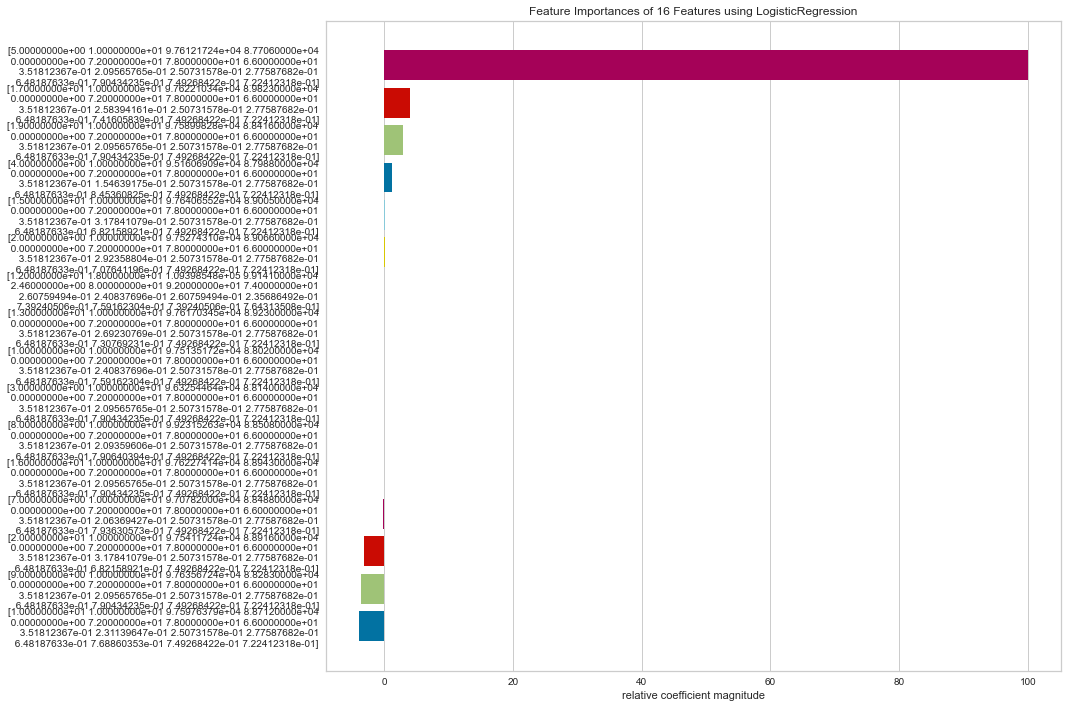

<AxesSubplot:title={'center':'Feature Importances of 16 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [132]:
from yellowbrick.features import FeatureImportances

model = LogisticRegression()
viz = FeatureImportances(model, labels=X_resampled, size=(1080, 720))

viz.fit(X_resampled, y_resampled)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.show()

In [ ]:
#Seems like I made an error somewhere along the way here. 